In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T 

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [23]:
print(torch.__version__)

2.8.0+cu129


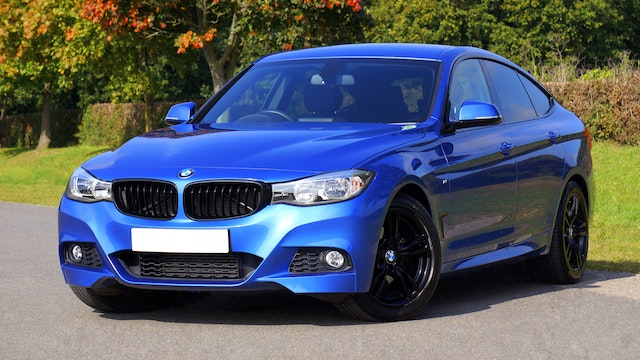

In [24]:
img = Image.open("car.jpg")
img

In [25]:
transforms = T.Compose([
    T.Resize((450)),
    T.ToTensor()
])

In [26]:
img_tensor = transforms(img)
img_tensor.shape

torch.Size([3, 450, 800])

Pytorch needs the data to have an extra dimension for Batch Size, using unsqueeze(0) to add another dimension on the indicated position with a value of 1.

In [27]:
img_tensor = transforms(img).unsqueeze(0)
img_tensor.shape

torch.Size([1, 3, 450, 800])

In [28]:
sharpen_kernel = [[[[0, -1, 0]],
                  [[-1, 5, -1]],
                  [[0, -1, 0]]]]

In [29]:
sharpen_filter = torch.tensor(sharpen_kernel)
sharpen_filter.shape

torch.Size([1, 3, 1, 3])

In [31]:
conv_tensor = F.conv2d(img_tensor, sharpen_filter.float(), padding=0)
conv_tensor.shape

torch.Size([1, 1, 450, 798])

In [32]:
# Get rid of the batch dimension to obtain just the image tensor
conv_img = conv_tensor.squeeze(0)
conv_img.shape

torch.Size([1, 450, 798])

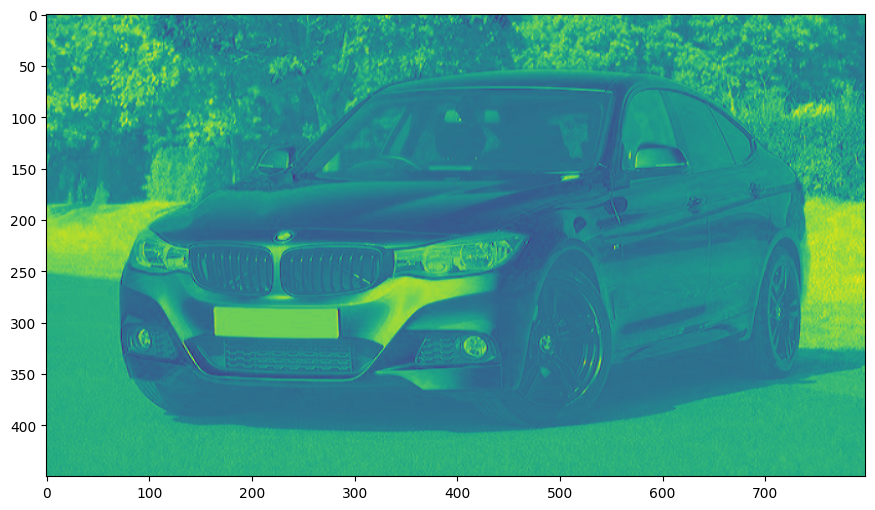

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(conv_img.squeeze(0)) # remove the color channel dimension for plt (Just 1 channel was not enough for color, default is this greenish color)

In [36]:
pool = nn.MaxPool2d(2, 2) # kernel size 2, stride 2
pool 

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [37]:
pool_tensor = pool(conv_tensor)
pool_tensor.shape

torch.Size([1, 1, 225, 399])

In [38]:
pool_img = pool_tensor.squeeze(0)
pool_img.shape

torch.Size([1, 225, 399])

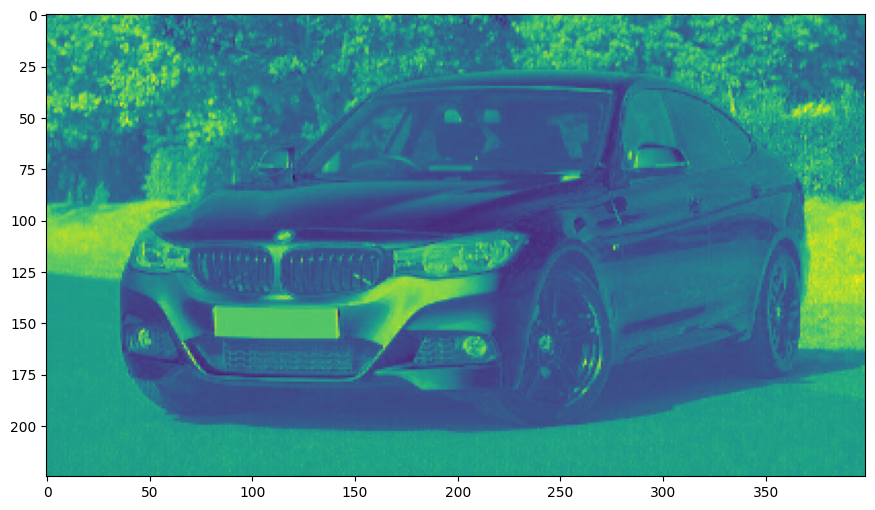

In [39]:
plt.figure(figsize=(12,6))
plt.imshow(pool_img.squeeze(0)) # remove the color channel dimension for plt

In [43]:
def apply_kernel_and_show(img, kernel):
    
    filter = torch.tensor(kernel)
    img_tensor = transforms(img).unsqueeze(0)
    conv_tensor = F.conv2d(img_tensor, filter.float(), padding=0)
    
    conv_img = conv_tensor.squeeze(0)
    pool = nn.MaxPool2d(2, 2) # kernel size 2, stride 2
    pool_tensor = pool(conv_tensor)

    pool_img = pool_tensor.squeeze(0)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 6)

    fig.suptitle('Convolution and Pooling Results', fontsize=16)

    ax1.imshow(conv_img.squeeze(0))
    ax2.imshow(pool_img.squeeze(0))

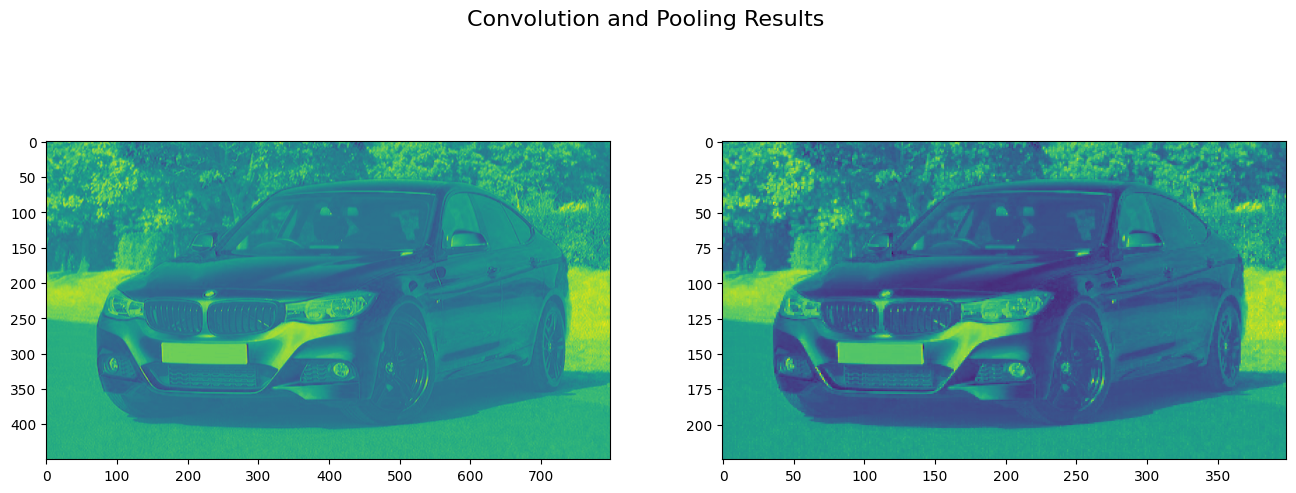

In [44]:
apply_kernel_and_show(img, sharpen_kernel)

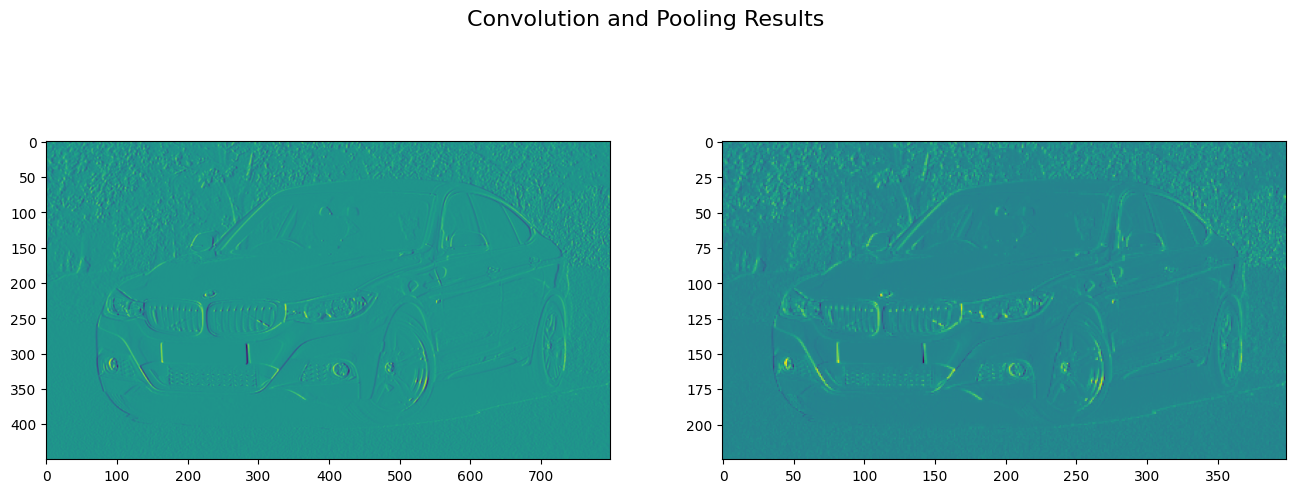

In [45]:
vertical_edge_kernel = [[[[-1, 0, 1]],
                         [[-1, 0, 1]],  
                         [[-1, 0, 1]]]]

apply_kernel_and_show(img, vertical_edge_kernel)

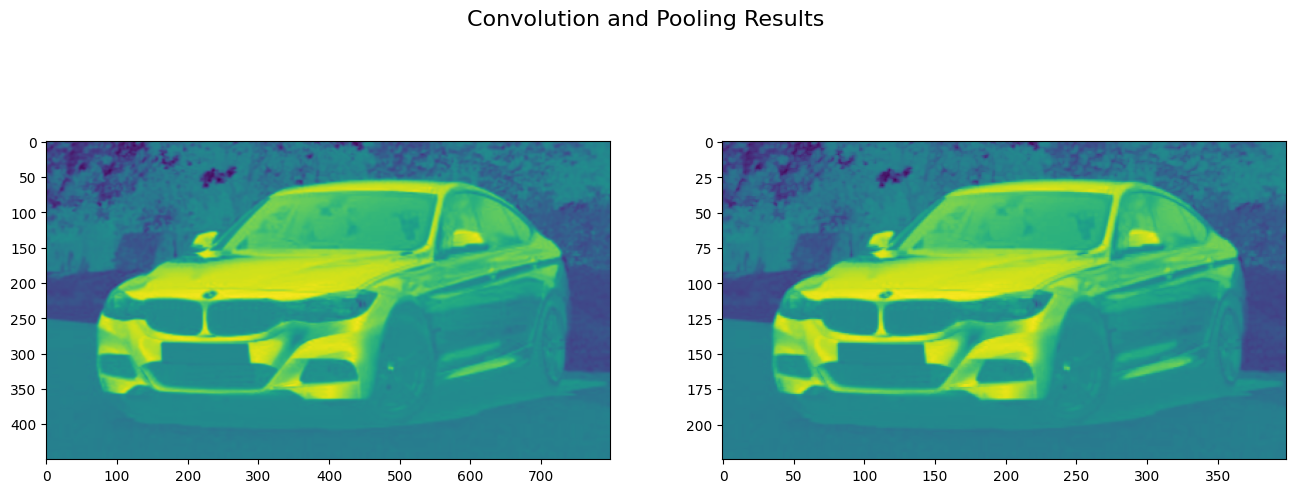

In [47]:
horizontal_edge_kernel = [[[[-1, -1, -1]],
                           [[0, 0, 0]], 
                           [[1, 1, 1]]]]

apply_kernel_and_show(img, horizontal_edge_kernel)

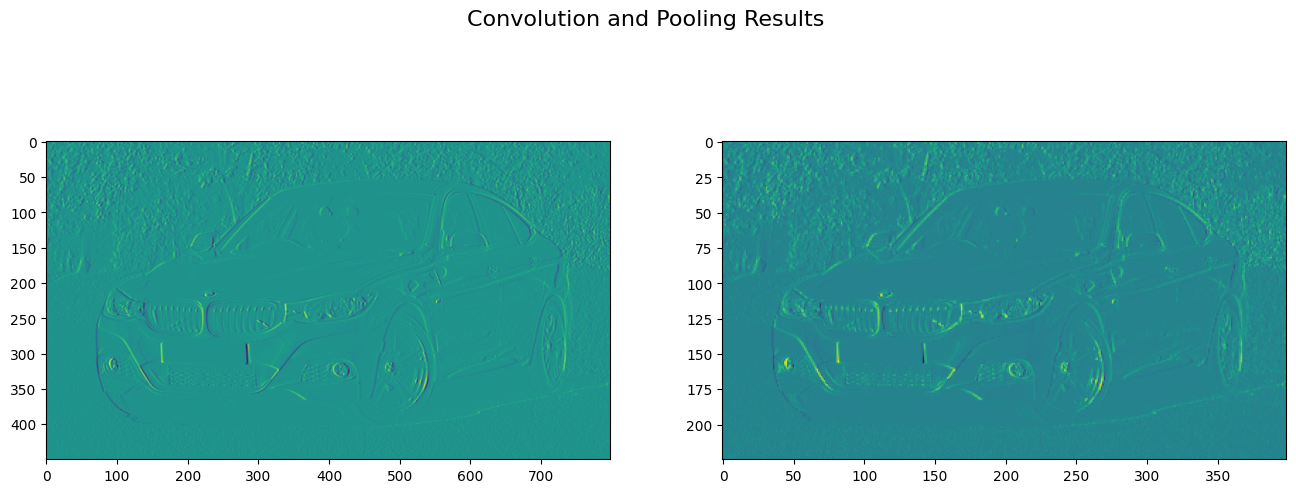

In [ ]:
vertical_edge_kernel = [[[[-1, 0, 1]], #Sobel filter
                         [[-2, 0, 2]],
                         [[-1, 0, 1]]]]

apply_kernel_and_show(img, vertical_edge_kernel)

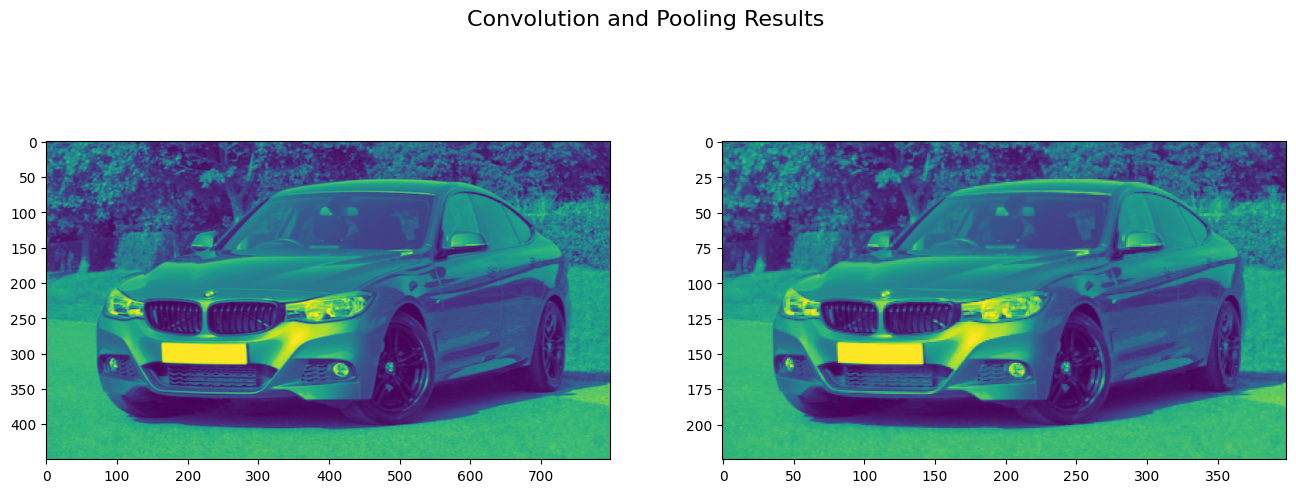

In [49]:
gaussian_blur_kernel = [[[[1/16, 2/16, 1/16]],
                         [[2/16, 4/16, 2/16]],
                         [[1/16, 2/16, 1/16]]]]

apply_kernel_and_show(img, gaussian_blur_kernel)

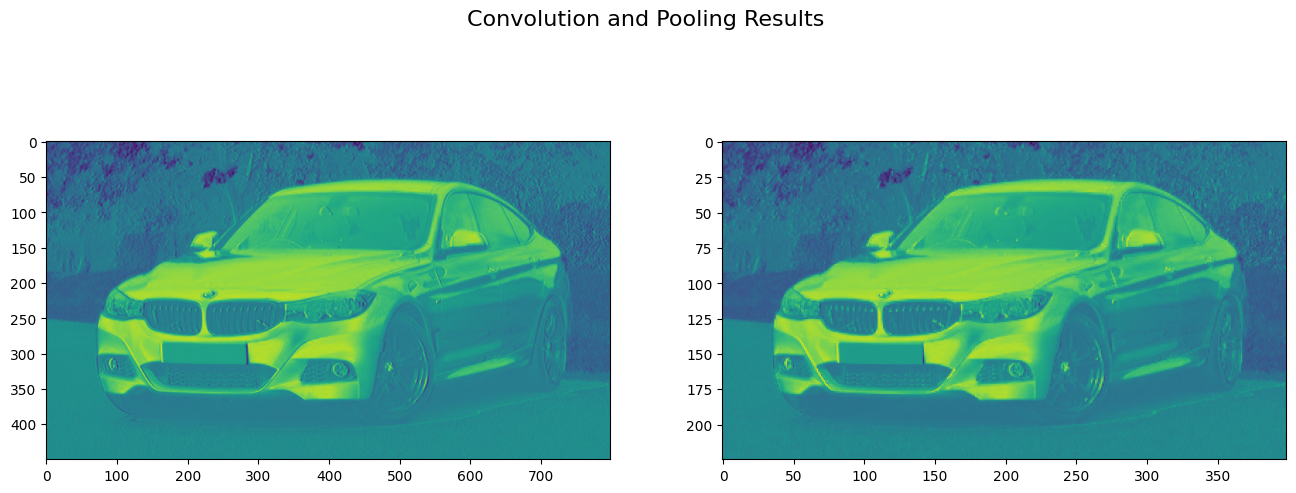

In [50]:
emboss_kernel = [[[[ -2, -1, 0]],
                  [[ -1, 1, 1]],    
                  [[ 0, 1, 2]]]]

apply_kernel_and_show(img, emboss_kernel)